<a href="https://colab.research.google.com/github/aidaaminian/snn-self-driving/blob/main/bproj_self_driving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install and Import

In [1]:
! sudo apt install python3-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pip-whl python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python-pip-whl python3-pip python3-setuptools python3-wheel
0 upgraded, 4 newly installed, 0 to remove and 13 not upgraded.
Need to get 2,389 kB of archives.
After this operation, 4,933 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python-pip-whl all 20.0.2-5ubuntu1.9 [1,805 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 python3-setuptools all 45.2.0-1ubuntu0.1 [330 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python3-wheel all 0.34.2-1ubuntu0.1 [23.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 python3-pip all 20.0.2-5ubuntu1.9 [231 kB]
Fetched 2,389 kB in 1s (2,

In [2]:
!sudo apt-get install python3.7-distutils
!wget https://bootstrap.pypa.io/get-pip.py
!python get-pip.py
!python -m pip install ipython ipython_genutils ipykernel jupyter_console prompt_toolkit httplib2 astor
!ln -s /usr/local/lib/python3.8/dist-packages/google \
       /usr/local/lib/python3.7/dist-packages/google

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python3.7-lib2to3
The following NEW packages will be installed:
  python3.7-distutils python3.7-lib2to3
0 upgraded, 2 newly installed, 0 to remove and 13 not upgraded.
Need to get 309 kB of archives.
After this operation, 1,229 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7-lib2to3 all 3.7.17-1+focal1 [122 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 python3.7-distutils all 3.7.17-1+focal1 [187 kB]
Fetched 309 kB in 1s (393 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debc

In [3]:
!pip install -q --upgrade ipython==7.34.0
!pip install -q --upgrade ipykernel==5.5.6

In [4]:
!gdown --id 1BuZNKbH3qWgedopUGwW9Gfue7oCbBTDm

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BuZNKbH3qWgedopUGwW9Gfue7oCbBTDm
To: /content/traffic-sign-yolo.zip
100% 261M/261M [00:01<00:00, 150MB/s]


In [5]:
!unzip "/content/traffic-sign-yolo.zip" -d "/content/"

Archive:  /content/traffic-sign-yolo.zip
   creating: /content/traffic-sign-yolo/
  inflating: /content/traffic-sign-yolo/00000.jpg  
  inflating: /content/traffic-sign-yolo/00000.txt  
  inflating: /content/traffic-sign-yolo/00001.jpg  
  inflating: /content/traffic-sign-yolo/00001.txt  
  inflating: /content/traffic-sign-yolo/00002.jpg  
  inflating: /content/traffic-sign-yolo/00002.txt  
  inflating: /content/traffic-sign-yolo/00003.jpg  
  inflating: /content/traffic-sign-yolo/00003.txt  
  inflating: /content/traffic-sign-yolo/00004.jpg  
  inflating: /content/traffic-sign-yolo/00004.txt  
  inflating: /content/traffic-sign-yolo/00005.jpg  
  inflating: /content/traffic-sign-yolo/00005.txt  
  inflating: /content/traffic-sign-yolo/00006.jpg  
  inflating: /content/traffic-sign-yolo/00006.txt  
  inflating: /content/traffic-sign-yolo/00007.jpg  
  inflating: /content/traffic-sign-yolo/00007.txt  
  inflating: /content/traffic-sign-yolo/00008.jpg  
  inflating: /content/traffic-sign

In [6]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Replace images with autoencoder output

In [7]:
# Recreated data
!gdown 1-8yItXnIYANQ-9rf_jDUcQe_tzqPgj9d
!unzip -o "/content/ts-recreate.zip" -d "/content/traffic-sign-yolo"

Downloading...
From: https://drive.google.com/uc?id=1-8yItXnIYANQ-9rf_jDUcQe_tzqPgj9d
To: /content/ts-recreate.zip
100% 182M/182M [00:01<00:00, 137MB/s]
Archive:  /content/ts-recreate.zip
  inflating: /content/traffic-sign-yolo/00193.jpg  
  inflating: /content/traffic-sign-yolo/00463.jpg  
  inflating: /content/traffic-sign-yolo/00838.jpg  
  inflating: /content/traffic-sign-yolo/00038.jpg  
  inflating: /content/traffic-sign-yolo/00251.jpg  
  inflating: /content/traffic-sign-yolo/00369.jpg  
  inflating: /content/traffic-sign-yolo/00307.jpg  
  inflating: /content/traffic-sign-yolo/00072.jpg  
  inflating: /content/traffic-sign-yolo/00828.jpg  
  inflating: /content/traffic-sign-yolo/00603.jpg  
  inflating: /content/traffic-sign-yolo/00316.jpg  
  inflating: /content/traffic-sign-yolo/00401.jpg  
  inflating: /content/traffic-sign-yolo/00236.jpg  
  inflating: /content/traffic-sign-yolo/00160.jpg  
  inflating: /content/traffic-sign-yolo/00656.jpg  
  inflating: /content/traffic-si

In [8]:
# # Noisy data
# !gdown 1-6jaJz7V0bE6BytMu3cVQ0aOoRiLAaJ6
# !unzip -o "/content/ts-noise.zip" -d "/content/traffic-sign-yolo"

In [9]:
# # Denoised data
# !gdown 1wU3IWfooF-twuC9_rdJQE9HB83xj_2s-
# !unzip -o "/content/ts-denoise.zip" -d "/content/traffic-sign-yolo"

### Explanatory Analysis

#### Draw Bounding Box

In [10]:
img_path = '/content/traffic-sign-yolo/00043'

In [11]:
img_bgr = cv2.imread(img_path + '.jpg')

In [12]:
with open(img_path + '.txt') as f:
    box_list = []
    for line in f:
        box_list += [line.rstrip()]

In [13]:
h, w = img_bgr.shape[:2]
c_names = ['prohibitory', 'danger', 'mandatory', 'other']
c_colors = [[0,0,255], [255,255,0], [0,255,0], [255,0,0]]

In [14]:
for i in range(len(box_list)):
    box_args = box_list[i].split()
    x_center, y_center = int(float(box_args[1]) * w), int(float(box_args[2]) * h)
    w_box, h_box = int(float(box_args[3]) * w), int(float(box_args[4]) * h)
    x_min = int(x_center - (w_box / 2))
    y_min = int(y_center - (h_box / 2))
    cv2.rectangle(img_bgr, (x_min, y_min), (x_min + w_box, y_min + h_box), c_colors[int(box_args[0])], 2)
    class_current = c_names[int(box_args[0])]
    cv2.putText(img_bgr, class_current, (x_min, y_min - 5), cv2.FONT_HERSHEY_COMPLEX, 0.7, c_colors[int(box_args[0])], 2)

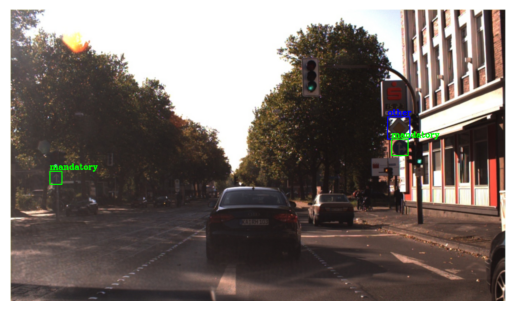

In [15]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Train Model

In [16]:
!gdown 1i1IrGd4ochHbe0Xq2xqlt4TJi1t-Stlv

Downloading...
From: https://drive.google.com/uc?id=1i1IrGd4ochHbe0Xq2xqlt4TJi1t-Stlv
To: /content/spiking-yolo-code.zip
100% 71.7k/71.7k [00:00<00:00, 75.7MB/s]


In [17]:
!unzip "/content/spiking-yolo-code.zip" -d "/content/"

Archive:  /content/spiking-yolo-code.zip
   creating: /content/spiking_utils/
  inflating: /content/spiking_utils/ann_parser.py  
  inflating: /content/spiking_utils/snn_evaluate.py  
  inflating: /content/spiking_utils/snn_transformer.py  
  inflating: /content/spiking_utils/spike_dag.py  
  inflating: /content/spiking_utils/spike_layer.py  
  inflating: /content/spiking_utils/spike_tensor.py  
   creating: /content/utils/
  inflating: /content/utils/adabound.py  
  inflating: /content/utils/datasets.py  
  inflating: /content/utils/evolve.sh  
  inflating: /content/utils/gcp.sh   
  inflating: /content/utils/google_utils.py  
  inflating: /content/utils/layers.py  
  inflating: /content/utils/parse_config.py  
  inflating: /content/utils/torch_utils.py  
  inflating: /content/utils/utils.py  
 extracting: /content/utils/__init__.py  
  inflating: /content/ann_to_snn.py  
  inflating: /content/models.py      
  inflating: /content/requirements.txt  
  inflating: /content/test.py      

In [18]:
!gdown 1KSyhSn1RdzGGIVt9fbF-VATB2Mtsw8LH

Downloading...
From: https://drive.google.com/uc?id=1KSyhSn1RdzGGIVt9fbF-VATB2Mtsw8LH
To: /content/utils.zip
100% 229M/229M [00:01<00:00, 185MB/s]


In [19]:
!unzip "/content/utils.zip" -d "/content/"

Archive:  /content/utils.zip
  inflating: /content/classes.names  
  inflating: /content/test.txt       
  inflating: /content/train.txt      
  inflating: /content/ts.cfg         
  inflating: /content/ts.data        
  inflating: /content/ts.weights     


In [20]:
! python3 train.py --batch-size 32 --cfg 'ts.cfg' --data 'ts.data' --weights ''


2023-06-23 15:03:34.604411: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 15:03:35.848819: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(epochs=300, batch_size=32, cfg='ts.cfg', data='ts.data', multi_scale=False, img_size=[320, 640, 640], rect=False, resume=False, nosave=False, notest=False, evolve=False, bucket='', cache_images=False, weights='', name='', device='', adam=False, single_cls=False, freeze_layers=False)
Using CPU

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 222 layers, 6.15399e+07 parameters, 6.15399e+07 gradients
Optimizer groups: 

In [21]:
! python3 test.py --cfg 'ts.cfg' --data 'ts.data' --weights 'ts.weights' --batch-size 32


Namespace(cfg='ts.cfg', data='ts.data', weights='ts.weights', batch_size=32, img_size=512, conf_thres=0.001, iou_thres=0.6, save_json=False, task='test', device='', single_cls=False, augment=False)
Using CPU

Model Summary: 222 layers, 6.15399e+07 parameters, 6.15399e+07 gradients
Fusing layers...
Model Summary: 150 layers, 6.15136e+07 parameters, 6.15136e+07 gradients
Caching labels /content/test.txt (111 found, 0 missing, 0 empty, 0 duplicate, for 111 images): 100% 111/111 [00:00<00:00, 1012.20it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1:   0% 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
               Class    Images   Targets         P         R   mAP@0.5    